In [13]:
import numpy as np

def stressen(A, B, n):
    if n == 1:
        return A * B
    else:
        row, col = n // 2, n // 2
        a11 = A[:row, :col]
        a12 = A[:row, col:]
        a21 = A[row:, :col]
        a22 = A[row:, col:]
        
        b11 = B[:row, :col]
        b12 = B[:row, col:]
        b21 = B[row:, :col]
        b22 = B[row:, col:]
        
        P1 = stressen(a11, np.subtract(b12, b22), n // 2)
        P2 = stressen(np.add(a11, a12), b22, n // 2)
        P3 = stressen(np.add(a21, a22), b11, n // 2)
        P4 = stressen(a22, np.subtract(b21, b11), n // 2)
        P5 = stressen(np.add(a11, a22), np.add(b11, b22), n // 2)
        P6 = stressen(np.subtract(a12, a22), np.add(b21, b22), n // 2)
        P7 = stressen(np.subtract(a11, a21), np.add(b11, b12), n // 2)
        
        c11 = P5 + P4 - P2 + P6
        c12 = P1 + P2
        c21 = P4 + P3
        c22 = P1 + P5 - P3 - P7
    
        C = np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))
        return C

A = [[1, 2, 3, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12],
     [13, 14, 15, 16]]

A = np.array(A)
B = A  # Đảm bảo B có cùng kích thước và định dạng với A
print(stressen(A, B, 4))


[[ 90 100 110 120]
 [202 228 254 280]
 [314 356 398 440]
 [426 484 542 600]]


Sorted array: [1, 1, 2, 3, 6, 8, 10]


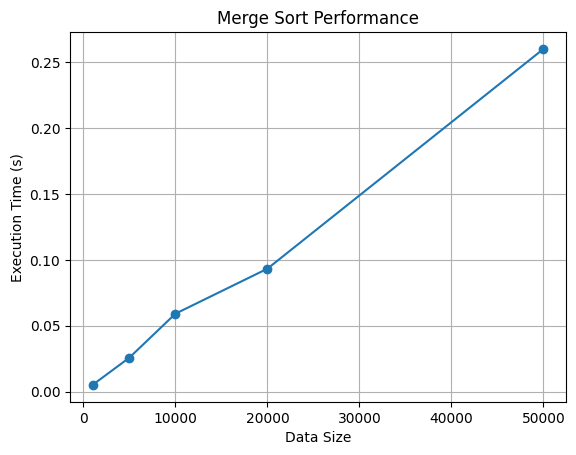

In [18]:
import time
import matplotlib.pyplot as plt
import numpy as np
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    
    # Tìm chỉ số trung tâm của mảng
    mid = len(arr) // 2
    
    # Chia mảng thành hai nửa
    left_half = arr[:mid]
    right_half = arr[mid:]
    
    # Đệ quy gọi merge_sort cho hai nửa
    left_sorted = merge_sort(left_half)
    right_sorted = merge_sort(right_half)
    
    # Gộp hai nửa đã sắp xếp lại với nhau
    return merge(left_sorted, right_sorted)

def merge(left, right):
    sorted_arr = []
    left_index, right_index = 0, 0
    
    # Merge hai mảng đã sắp xếp vào sorted_arr
    while left_index < len(left) and right_index < len(right):
        if left[left_index] <= right[right_index]:
            sorted_arr.append(left[left_index])
            left_index += 1
        else:
            sorted_arr.append(right[right_index])
            right_index += 1
    
    # Nếu còn phần tử dư ở một trong hai mảng
    sorted_arr.extend(left[left_index:])
    sorted_arr.extend(right[right_index:])
    
    return sorted_arr

# Sử dụng merge sort trên một list ví dụ
arr = [3, 6, 8, 10, 1, 2, 1]
sorted_arr = merge_sort(arr)
print("Sorted array:", sorted_arr)

# Đo thời gian thực hiện merge sort trên các kích thước dữ liệu khác nhau
data_sizes = [1000, 5000, 10000, 20000, 50000]
execution_times = []

for size in data_sizes:
    arr = np.random.randint(0, 10000, size=size)
    start_time = time.time()
    sorted_arr = merge_sort(arr)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# Vẽ biểu đồ
plt.plot(data_sizes, execution_times, marker='o')
plt.title('Merge Sort Performance')
plt.xlabel('Data Size')
plt.ylabel('Execution Time (s)')
plt.grid(True)
plt.show()

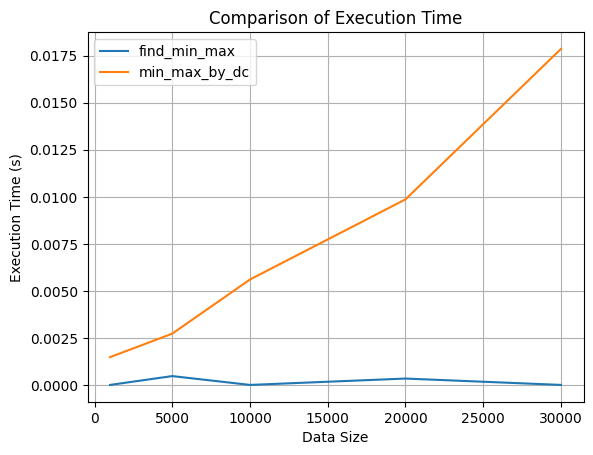

In [20]:
import time
import matplotlib.pyplot as plt

def find_min_max(arr):
    max_val = arr[0]
    min_val = float('inf')
    for num in arr:
        if num > max_val:
            max_val = num
        if num < min_val:
            min_val = num
    return min_val, max_val

def min_max_by_dc(arr, left, right):
    if right - left <= 1:
        min_val = min(arr[left], arr[right])
        max_val = max(arr[left], arr[right])
        return min_val, max_val
    else:
        mid = (left + right) // 2
        min_val1, max_val1 = min_max_by_dc(arr, left, mid)
        min_val2, max_val2 = min_max_by_dc(arr, mid + 1, right)
        return min(min_val1, min_val2), max(max_val1, max_val2)

# Đo thời gian thực hiện của hai hàm trên các kích thước dữ liệu khác nhau
data_sizes = [1000, 5000, 10000, 20000, 30000]
execution_times_find_min_max = []
execution_times_min_max_by_dc = []

for size in data_sizes:
    arr = list(range(size))  # Tạo một mảng tăng dần từ 0 đến size - 1
    start_time = time.time()
    min_max = find_min_max(arr)
    end_time = time.time()
    execution_times_find_min_max.append(end_time - start_time)

    start_time = time.time()
    min_max_dc = min_max_by_dc(arr, 0, size - 1)
    end_time = time.time()
    execution_times_min_max_by_dc.append(end_time - start_time)

# Vẽ biểu đồ
plt.plot(data_sizes, execution_times_find_min_max, label='find_min_max')
plt.plot(data_sizes, execution_times_min_max_by_dc, label='min_max_by_dc')
plt.title('Comparison of Execution Time')
plt.xlabel('Data Size')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.grid(True)
plt.show()


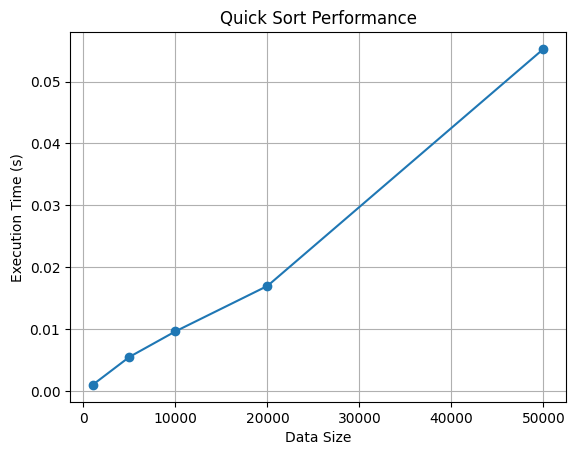

In [22]:
import time
import matplotlib.pyplot as plt

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def sort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        sort(arr, low, pi - 1)
        sort(arr, pi + 1, high)

def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

def quick_sort(arr, left, right):
    i = left
    j = right
    pivot = arr[(left + right) // 2]
    while i <= j:
        while arr[i] < pivot:
            i += 1
        while arr[j] > pivot:
            j -= 1
        if i <= j:
            swap(arr, i, j)
            i += 1
            j -= 1
    if left < j:
        quick_sort(arr, left, j)
    if right > i:
        quick_sort(arr, i, right)

# Hàm đo thời gian thực hiện
def measure_time(data_sizes):
    execution_times = []
    for size in data_sizes:
        arr = list(range(size))  # Mảng tăng dần từ 0 đến size - 1
        start_time = time.time()
        quick_sort(arr, 0, size - 1)
        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)
    return execution_times

# Kích thước dữ liệu
data_sizes = [1000, 5000, 10000, 20000, 50000]

# Đo thời gian thực hiện
execution_times = measure_time(data_sizes)

# Vẽ biểu đồ
plt.plot(data_sizes, execution_times, marker='o')
plt.title('Quick Sort Performance')
plt.xlabel('Data Size')
plt.ylabel('Execution Time (s)')
plt.grid(True)
plt.show()
